In [1]:
import numpy as np
import pandas
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, precision_score, recall_score, f1_score
from keras import layers, optimizers, models
from keras import backend as K
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.utils import plot_model
from keras.utils.vis_utils import model_to_dot
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from IPython.display import Image, SVG
import pandas as pd

Using TensorFlow backend.
C:\Users\mb207\Anaconda3\envs\opencv\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\mb207\Anaconda3\envs\opencv\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\mb207\Anaconda3\envs\opencv\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\mb207\Anaconda3\envs\opencv\lib\sit

In [2]:
data = pandas.read_csv("Shill Bidding Dataset.csv")

In [21]:
data

,Record_ID,Auction_ID,Bidder_ID,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
0,1,732,_***i,0.200000,0.400000,0.0,0.000028,0.000000,0.993593,0.000028,0.666667,5,0
1,2,732,g***r,0.024390,0.200000,0.0,0.013123,0.000000,0.993593,0.013123,0.944444,5,0
2,3,732,t***p,0.142857,0.200000,0.0,0.003042,0.000000,0.993593,0.003042,1.000000,5,0
3,4,732,7***n,0.100000,0.200000,0.0,0.097477,0.000000,0.993593,0.097477,1.000000,5,0
4,5,900,z***z,0.051282,0.222222,0.0,0.001318,0.000000,0.000000,0.001242,0.500000,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6316,15129,760,l***t,0.333333,0.160000,1.0,0.738557,0.280000,0.993593,0.686358,0.888889,3,1
6317,15137,2481,s***s,0.030612,0.130435,0.0,0.005754,0.217391,0.993593,0.000010,0.878788,7,0
6318,15138,2481,h***t,0.055556,0.043478,0.0,0.015663,0.217391,0.993593,0.015663,0.000000,7,0
6319,15139,2481,d***d,0.076923,0.086957,0.0,0.068694,0.217391,0.993593,0.000415,0.000000,7,0


In [3]:
data = data.drop(['Record_ID', 'Auction_ID', 'Bidder_ID', 'Auction_Duration'], axis = 1)
data[:10]

,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Class
0,0.200000,0.400000,0.0,0.000028,0.000000,0.993593,0.000028,0.666667,0
1,0.024390,0.200000,0.0,0.013123,0.000000,0.993593,0.013123,0.944444,0
2,0.142857,0.200000,0.0,0.003042,0.000000,0.993593,0.003042,1.000000,0
3,0.100000,0.200000,0.0,0.097477,0.000000,0.993593,0.097477,1.000000,0
4,0.051282,0.222222,0.0,0.001318,0.000000,0.000000,0.001242,0.500000,0
5,0.038462,0.111111,0.0,0.016844,0.000000,0.000000,0.016844,0.800000,0
6,0.400000,0.222222,0.0,0.006781,0.000000,0.000000,0.006774,0.750000,0
7,0.137931,0.444444,1.0,0.768044,0.000000,0.000000,0.016311,1.000000,1
8,0.121951,0.185185,1.0,0.035021,0.333333,0.993528,0.023963,0.944444,1
9,0.155172,0.346154,0.5,0.570994,0.307692,0.993593,0.413788,0.611111,1


In [4]:
y = data['Class']
X = data.drop(['Class'],axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [24]:
X_train

,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio
6177,0.073171,0.076923,0.0,0.576319,0.538462,0.993593,0.000033,0.000000
773,0.009063,0.375000,0.0,0.113917,0.000000,0.000000,0.039645,0.848214
3963,0.058824,0.200000,0.0,0.247467,0.000000,0.000000,0.247467,0.600000
2962,0.348837,0.666667,1.0,0.981964,0.600000,0.993593,0.981736,0.857143
1913,0.026316,0.090909,0.0,0.057568,0.000000,0.000000,0.057568,0.000000
...,...,...,...,...,...,...,...,...
896,0.086420,0.205882,1.0,0.953870,0.470588,0.993593,0.950463,0.885714
3398,0.180000,0.375000,1.0,0.877025,0.250000,0.993593,0.877025,1.000000
410,0.095238,0.058824,0.0,0.989729,0.470588,0.993593,0.989714,0.000000
5754,0.090909,0.066667,0.0,0.858646,0.000000,0.000000,0.858646,0.000000


In [25]:
X_test

,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio
3830,0.086957,0.285714,0.0,0.002994,0.000000,0.000000,0.002994,0.882353
2653,0.010204,0.023256,0.0,0.000009,0.581395,0.993593,0.000009,0.000000
5693,0.043478,0.400000,0.0,0.145825,0.000000,0.000000,0.000010,0.833333
5282,0.181818,0.153846,0.0,0.532688,0.000000,0.000000,0.532688,1.000000
3872,0.133333,0.200000,0.0,0.628854,0.000000,0.000000,0.108468,1.000000
...,...,...,...,...,...,...,...,...
2854,0.120000,0.200000,1.0,0.616516,0.400000,0.993593,0.616481,1.000000
4958,0.040000,0.200000,0.0,0.552847,0.000000,0.000000,0.552847,1.000000
123,0.400000,0.200000,0.0,0.000772,0.000000,0.000000,0.000772,1.000000
4000,0.022222,0.025641,0.0,0.768054,0.538462,0.999935,0.768054,0.000000


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 64)                576       
_________________________________________________________________
dense_12 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_13 (Dense)             (None, 32)                1056      
_________________________________________________________________
dropout_3 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 17        
Total params: 4,257
Trainable params: 4,257
Non-trainable params: 0
_________________________________________________________________
Train on

4044/4044 [==============================] - 0s 49us/step - loss: 0.0460 - acc: 0.9750 - val_loss: 0.0595 - val_acc: 0.9723

Epoch 00036: val_loss did not improve
Epoch 37/1000
4044/4044 [==============================] - 0s 52us/step - loss: 0.0456 - acc: 0.9765 - val_loss: 0.0614 - val_acc: 0.9713

Epoch 00037: val_loss did not improve
Epoch 38/1000
4044/4044 [==============================] - 0s 52us/step - loss: 0.0448 - acc: 0.9770 - val_loss: 0.0605 - val_acc: 0.9713

Epoch 00038: val_loss did not improve
Epoch 39/1000
4044/4044 [==============================] - 0s 51us/step - loss: 0.0460 - acc: 0.9763 - val_loss: 0.0591 - val_acc: 0.9743

Epoch 00039: val_loss did not improve
Epoch 40/1000
4044/4044 [==============================] - 0s 56us/step - loss: 0.0449 - acc: 0.9768 - val_loss: 0.0585 - val_acc: 0.9753

Epoch 00040: val_loss improved from 0.05903 to 0.05853, saving model to ./model.h5
Epoch 41/1000
4044/4044 [==============================] - 0s 66us/step - loss: 0.04

Epoch 80/1000
4044/4044 [==============================] - 0s 71us/step - loss: 0.0415 - acc: 0.9770 - val_loss: 0.0567 - val_acc: 0.9763

Epoch 00080: val_loss did not improve
Epoch 81/1000
4044/4044 [==============================] - 0s 67us/step - loss: 0.0425 - acc: 0.9787 - val_loss: 0.0568 - val_acc: 0.9763

Epoch 00081: val_loss did not improve
Epoch 82/1000
4044/4044 [==============================] - 0s 57us/step - loss: 0.0423 - acc: 0.9782 - val_loss: 0.0571 - val_acc: 0.9763

Epoch 00082: val_loss did not improve
Epoch 83/1000
4044/4044 [==============================] - 0s 61us/step - loss: 0.0408 - acc: 0.9785 - val_loss: 0.0559 - val_acc: 0.9743

Epoch 00083: val_loss did not improve
Epoch 84/1000
4044/4044 [==============================] - 0s 64us/step - loss: 0.0418 - acc: 0.9790 - val_loss: 0.0551 - val_acc: 0.9753

Epoch 00084: val_loss improved from 0.05563 to 0.05514, saving model to ./model.h5
Epoch 85/1000
4044/4044 [==============================] - 0s 63us/ste

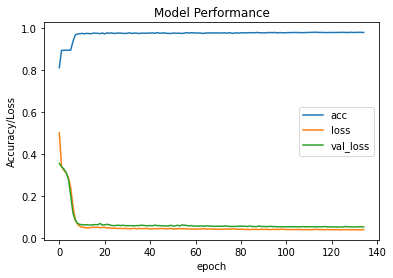

In [26]:
# 建構 model
model = models.Sequential()
model.add(layers.Dense(64, input_shape=(X_train.shape[1],), activation="sigmoid"))
model.add(layers.Dense(32, activation="relu"))
model.add(layers.Dense(32, activation="relu"))
model.add(layers.Dropout(0.05))
model.add(layers.Dense(16, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))

# opt = optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 顯示模型摘要與結構
model.summary()

es = EarlyStopping(monitor='val_loss', patience=10, mode='auto', verbose=1)
checkpointer = ModelCheckpoint('./model.h5',verbose=1, save_best_only=True)

# 開始訓練 model
history = model.fit(X_train, y_train, validation_split=0.2, epochs=1000, batch_size=128, callbacks=[es,checkpointer])

print("[INFO] Best loss: {}".format(np.min(history.history['loss'])))
print("[INFO] Best acc: {}".format(np.max(history.history['acc'])))
print("[INFO] Best val_loss: {}".format(np.min(history.history['val_loss'])))
print("[INFO] Best val_acc: {}".format(np.max(history.history['val_acc'])))

plt.plot(history.history['acc'], label='acc')
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Model Performance')
plt.ylabel('Accuracy/Loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

In [27]:
# 評估指標
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Acc : " + str(accuracy))
print("Test Loss : " + str(loss))

1265/1265 [==============================] - 0s 74us/step
Test Acc : 0.9826086956521739
Test Loss : 0.0417844298909503


In [28]:
y_pred = model.predict(X_test)
y_true = y_test

In [29]:
for i in range(len(y_pred)):
        max_value=max(y_pred[i])
        for j in range(len(y_pred[i])):
            if max_value==y_pred[i][j]:
                y_pred[i][j]=1
            else:
                y_pred[i][j]=0

In [30]:
print('Precision : ' + str(precision_score(y_true, y_pred)))
print('Recall : ' + str(recall_score(y_true, y_pred)))
print('F1 : ' + str(f1_score(y_true,  y_pred)))

Precision : 0.10909090909090909
Recall : 1.0
F1 : 0.19672131147540983


# 不同節點

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 128)               1152      
_________________________________________________________________
dense_17 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_18 (Dense)             (None, 32)                2080      
_________________________________________________________________
dropout_4 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_19 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 17        
Total params: 12,033
Trainable params: 12,033
Non-trainable params: 0
_________________________________________________________________
Train 


Epoch 00035: val_loss did not improve
Epoch 36/1000
4044/4044 [==============================] - 0s 62us/step - loss: 0.0444 - acc: 0.9755 - val_loss: 0.0618 - val_acc: 0.9753

Epoch 00036: val_loss did not improve
Epoch 37/1000
4044/4044 [==============================] - 0s 52us/step - loss: 0.0475 - acc: 0.9750 - val_loss: 0.0644 - val_acc: 0.9763

Epoch 00037: val_loss did not improve
Epoch 38/1000
4044/4044 [==============================] - 0s 54us/step - loss: 0.0479 - acc: 0.9765 - val_loss: 0.0600 - val_acc: 0.9763

Epoch 00038: val_loss did not improve
Epoch 39/1000
4044/4044 [==============================] - 0s 54us/step - loss: 0.0451 - acc: 0.9807 - val_loss: 0.0569 - val_acc: 0.9733

Epoch 00039: val_loss improved from 0.05761 to 0.05692, saving model to ./model.h5
Epoch 40/1000
4044/4044 [==============================] - 0s 91us/step - loss: 0.0429 - acc: 0.9768 - val_loss: 0.0564 - val_acc: 0.9743

Epoch 00040: val_loss improved from 0.05692 to 0.05645, saving model 

4044/4044 [==============================] - 0s 66us/step - loss: 0.0409 - acc: 0.9802 - val_loss: 0.0539 - val_acc: 0.9743

Epoch 00079: val_loss improved from 0.05423 to 0.05389, saving model to ./model.h5
Epoch 80/1000
4044/4044 [==============================] - 0s 71us/step - loss: 0.0409 - acc: 0.9792 - val_loss: 0.0551 - val_acc: 0.9763

Epoch 00080: val_loss did not improve
Epoch 81/1000
4044/4044 [==============================] - 0s 63us/step - loss: 0.0406 - acc: 0.9800 - val_loss: 0.0548 - val_acc: 0.9763

Epoch 00081: val_loss did not improve
Epoch 82/1000
4044/4044 [==============================] - 0s 55us/step - loss: 0.0434 - acc: 0.9790 - val_loss: 0.0545 - val_acc: 0.9763

Epoch 00082: val_loss did not improve
Epoch 83/1000
4044/4044 [==============================] - 0s 57us/step - loss: 0.0410 - acc: 0.9777 - val_loss: 0.0549 - val_acc: 0.9763

Epoch 00083: val_loss did not improve
Epoch 84/1000
4044/4044 [==============================] - 0s 58us/step - loss: 0.04

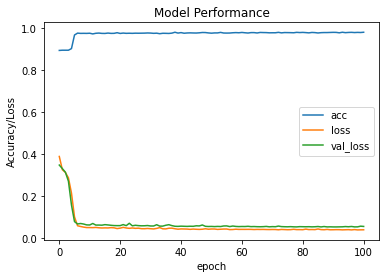

In [31]:
# 建構 model
model = models.Sequential()
model.add(layers.Dense(128, input_shape=(X_train.shape[1],), activation="sigmoid"))
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(32, activation="relu"))
model.add(layers.Dropout(0.05))
model.add(layers.Dense(16, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))

# opt = optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 顯示模型摘要與結構
model.summary()

es = EarlyStopping(monitor='val_loss', patience=10, mode='auto', verbose=1)
checkpointer = ModelCheckpoint('./model.h5',verbose=1, save_best_only=True)

# 開始訓練 model
history = model.fit(X_train, y_train, validation_split=0.2, epochs=1000, batch_size=128, callbacks=[es,checkpointer])

print("[INFO] Best loss: {}".format(np.min(history.history['loss'])))
print("[INFO] Best acc: {}".format(np.max(history.history['acc'])))
print("[INFO] Best val_loss: {}".format(np.min(history.history['val_loss'])))
print("[INFO] Best val_acc: {}".format(np.max(history.history['val_acc'])))

plt.plot(history.history['acc'], label='acc')
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Model Performance')
plt.ylabel('Accuracy/Loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

In [32]:
# 評估指標
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Acc : " + str(accuracy))
print("Test Loss : " + str(loss))

1265/1265 [==============================] - 0s 73us/step
Test Acc : 0.9818181818181818
Test Loss : 0.044491258341535604


In [33]:
y_pred = model.predict(X_test)
y_true = y_test

In [34]:
for i in range(len(y_pred)):
        max_value=max(y_pred[i])
        for j in range(len(y_pred[i])):
            if max_value==y_pred[i][j]:
                y_pred[i][j]=1
            else:
                y_pred[i][j]=0

In [35]:
print('Precision : ' + str(precision_score(y_true, y_pred)))
print('Recall : ' + str(recall_score(y_true, y_pred)))
print('F1 : ' + str(f1_score(y_true,  y_pred)))

Precision : 0.10909090909090909
Recall : 1.0
F1 : 0.19672131147540983


# 不同層數

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 64)                576       
_________________________________________________________________
dense_22 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_23 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_24 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_25 (Dense)             (None, 32)                1056      
_________________________________________________________________
dropout_5 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_26 (Dense)             (None, 16)                528       
__________

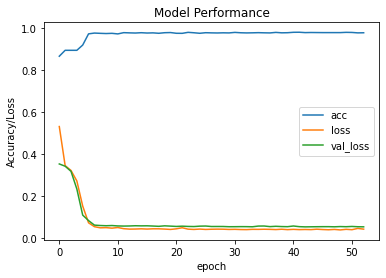

In [36]:
# 建構 model
model = models.Sequential()
model.add(layers.Dense(64, input_shape=(X_train.shape[1],), activation="sigmoid"))
model.add(layers.Dense(32, activation="relu"))
model.add(layers.Dense(32, activation="relu"))
model.add(layers.Dense(32, activation="relu"))
model.add(layers.Dense(32, activation="relu"))
model.add(layers.Dropout(0.05))
model.add(layers.Dense(16, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))

# opt = optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 顯示模型摘要與結構
model.summary()

es = EarlyStopping(monitor='val_loss', patience=10, mode='auto', verbose=1)
checkpointer = ModelCheckpoint('./model.h5',verbose=1, save_best_only=True)

# 開始訓練 model
history = model.fit(X_train, y_train, validation_split=0.2, epochs=1000, batch_size=128, callbacks=[es,checkpointer])

print("[INFO] Best loss: {}".format(np.min(history.history['loss'])))
print("[INFO] Best acc: {}".format(np.max(history.history['acc'])))
print("[INFO] Best val_loss: {}".format(np.min(history.history['val_loss'])))
print("[INFO] Best val_acc: {}".format(np.max(history.history['val_acc'])))

plt.plot(history.history['acc'], label='acc')
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Model Performance')
plt.ylabel('Accuracy/Loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

In [37]:
# 評估指標
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Acc : " + str(accuracy))
print("Test Loss : " + str(loss))

1265/1265 [==============================] - 0s 73us/step
Test Acc : 0.9826086956521739
Test Loss : 0.04205434046411453


In [38]:
y_pred = model.predict(X_test)
y_true = y_test

In [39]:
for i in range(len(y_pred)):
        max_value=max(y_pred[i])
        for j in range(len(y_pred[i])):
            if max_value==y_pred[i][j]:
                y_pred[i][j]=1
            else:
                y_pred[i][j]=0

In [40]:
print('Precision : ' + str(precision_score(y_true, y_pred)))
print('Recall : ' + str(recall_score(y_true, y_pred)))
print('F1 : ' + str(f1_score(y_true,  y_pred)))

Precision : 0.10909090909090909
Recall : 1.0
F1 : 0.19672131147540983


# 預測數值

In [13]:
data = pandas.read_csv("Shill Bidding Dataset.csv")
data

,Record_ID,Auction_ID,Bidder_ID,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
0,1,732,_***i,0.200000,0.400000,0.0,0.000028,0.000000,0.993593,0.000028,0.666667,5,0
1,2,732,g***r,0.024390,0.200000,0.0,0.013123,0.000000,0.993593,0.013123,0.944444,5,0
2,3,732,t***p,0.142857,0.200000,0.0,0.003042,0.000000,0.993593,0.003042,1.000000,5,0
3,4,732,7***n,0.100000,0.200000,0.0,0.097477,0.000000,0.993593,0.097477,1.000000,5,0
4,5,900,z***z,0.051282,0.222222,0.0,0.001318,0.000000,0.000000,0.001242,0.500000,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6316,15129,760,l***t,0.333333,0.160000,1.0,0.738557,0.280000,0.993593,0.686358,0.888889,3,1
6317,15137,2481,s***s,0.030612,0.130435,0.0,0.005754,0.217391,0.993593,0.000010,0.878788,7,0
6318,15138,2481,h***t,0.055556,0.043478,0.0,0.015663,0.217391,0.993593,0.015663,0.000000,7,0
6319,15139,2481,d***d,0.076923,0.086957,0.0,0.068694,0.217391,0.993593,0.000415,0.000000,7,0


In [14]:
data = data.drop(['Record_ID', 'Auction_ID', 'Bidder_ID', 'Auction_Duration','Class'], axis = 1)
data

,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio
0,0.200000,0.400000,0.0,0.000028,0.000000,0.993593,0.000028,0.666667
1,0.024390,0.200000,0.0,0.013123,0.000000,0.993593,0.013123,0.944444
2,0.142857,0.200000,0.0,0.003042,0.000000,0.993593,0.003042,1.000000
3,0.100000,0.200000,0.0,0.097477,0.000000,0.993593,0.097477,1.000000
4,0.051282,0.222222,0.0,0.001318,0.000000,0.000000,0.001242,0.500000
...,...,...,...,...,...,...,...,...
6316,0.333333,0.160000,1.0,0.738557,0.280000,0.993593,0.686358,0.888889
6317,0.030612,0.130435,0.0,0.005754,0.217391,0.993593,0.000010,0.878788
6318,0.055556,0.043478,0.0,0.015663,0.217391,0.993593,0.015663,0.000000
6319,0.076923,0.086957,0.0,0.068694,0.217391,0.993593,0.000415,0.000000


In [15]:
y = data['Winning_Ratio']
X = data.drop(['Winning_Ratio'],axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)



In [16]:
def percentage_error(actual, predicted):
    res = np.empty(actual.shape)
    for j in range(actual.shape[0]):
        if actual[j] != 0:
            res[j] = (actual[j] - predicted[j]) / actual[j]
        else:
            res[j] = predicted[j] / np.mean(actual)
    return res

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs(percentage_error(np.asarray(y_true), np.asarray(y_pred)))) * 100

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 64)                512       
_________________________________________________________________
dense_7 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_8 (Dense)              (None, 32)                1056      
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 17        
Total params: 4,193
Trainable params: 4,193
Non-trainable params: 0
_________________________________________________________________
Train on


Epoch 00021: val_loss did not improve
Epoch 22/1000
4044/4044 [==============================] - 0s 55us/step - loss: 0.0174 - mean_absolute_error: 0.0712 - mean_absolute_percentage_error: 18957601.1058 - val_loss: 0.0181 - val_mean_absolute_error: 0.0714 - val_mean_absolute_percentage_error: 22312775.6838

Epoch 00022: val_loss did not improve
Epoch 23/1000
4044/4044 [==============================] - 0s 47us/step - loss: 0.0169 - mean_absolute_error: 0.0705 - mean_absolute_percentage_error: 18261076.3185 - val_loss: 0.0177 - val_mean_absolute_error: 0.0691 - val_mean_absolute_percentage_error: 12575656.3083

Epoch 00023: val_loss improved from 0.01798 to 0.01772, saving model to ./model.h5
Epoch 24/1000
4044/4044 [==============================] - 0s 45us/step - loss: 0.0162 - mean_absolute_error: 0.0687 - mean_absolute_percentage_error: 16532054.6271 - val_loss: 0.0174 - val_mean_absolute_error: 0.0700 - val_mean_absolute_percentage_error: 14790201.2866

Epoch 00024: val_loss impro

4044/4044 [==============================] - 0s 53us/step - loss: 0.0095 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 6130538.7859 - val_loss: 0.0146 - val_mean_absolute_error: 0.0583 - val_mean_absolute_percentage_error: 6164745.9550

Epoch 00073: val_loss did not improve
Epoch 74/1000
4044/4044 [==============================] - 0s 56us/step - loss: 0.0091 - mean_absolute_error: 0.0466 - mean_absolute_percentage_error: 5186480.6845 - val_loss: 0.0141 - val_mean_absolute_error: 0.0580 - val_mean_absolute_percentage_error: 10223022.6443

Epoch 00074: val_loss did not improve
Epoch 75/1000
4044/4044 [==============================] - 0s 48us/step - loss: 0.0097 - mean_absolute_error: 0.0485 - mean_absolute_percentage_error: 5744484.4520 - val_loss: 0.0147 - val_mean_absolute_error: 0.0583 - val_mean_absolute_percentage_error: 11693968.5929

Epoch 00075: val_loss did not improve
Epoch 76/1000
4044/4044 [==============================] - 0s 53us/step - loss: 0.0093 - me

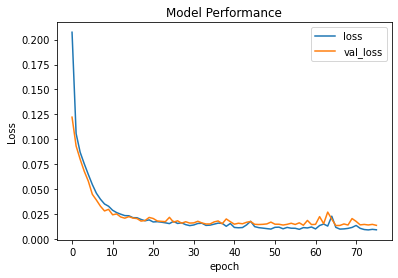

In [17]:
# 建構 model
model = models.Sequential()
model.add(layers.Dense(64, input_shape=(X_train.shape[1],), activation="relu"))
model.add(layers.Dense(32, activation="relu"))
model.add(layers.Dense(32, activation="relu"))
model.add(layers.Dropout(0.05))
model.add(layers.Dense(16, activation="relu"))
model.add(layers.Dense(1))

model.compile(loss='mse', optimizer="adam", metrics=['mae','MAPE'])

# 顯示模型摘要與結構
model.summary()

es = EarlyStopping(monitor='val_loss', patience=10, mode='auto', verbose=1)
checkpointer = ModelCheckpoint('./model.h5',verbose=1, save_best_only=True)

# 開始訓練 model
history = model.fit(X_train, y_train, validation_split=0.2, epochs=1000, batch_size=128, callbacks=[es,checkpointer])

print("[INFO] Best loss: {}".format(np.min(history.history['loss'])))
print("[INFO] Best val_loss: {}".format(np.min(history.history['val_loss'])))

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Model Performance')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

In [18]:
# 評估指標
mse, mae, mape = model.evaluate(X_test, y_test)
y_pred = model.predict(X_test)
print("Test MAPE : " + str(mean_absolute_percentage_error(y_test , y_pred)))
print("Test RMSE : " + str(np.sqrt(mse)))
print("Test MAE : " + str(mae))

1265/1265 [==============================] - 0s 71us/step
Test MAPE : 7.299486594866207
Test RMSE : 0.10880870090189568
Test MAE : 0.052451139918193515
